In [1]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import json

In [2]:
### SPRING

import pandas
colnames = ['maxVmag_counts','maxVmag_g', 'xValue_counts' ,'yValue_counts' ,'zValue_counts' ,'xValue_g' , 'yValue_g' ,'zValue_g' , 'maxVmagTime' , 'meanVmag_counts' , 'meanVmag_g' , 'sta' , 'staIndex' , 'startTimeFile','Category', 'Round', 'Heat','Day']

# Get the Spring Data
sp_data = open("./springClean/Magnitude/sp_vmag.csv", "r")

lines = sp_data.readline()

#print(heat, 'heat')
#print(category)
#print("day",day)

In [5]:
## Dictionary
# 'maxVmag_counts','maxVmag_g', 'xValue_counts' ,'yValue_counts' ,'zValue_counts' ,'xValue_g' , 'yValue_g' ,
#'zValue_g' , 'maxVmagTime' , 'meanVmag_counts' , 'meanVmag_g' , 'sta' , 'staIndex' , 'startTimeFile',
#'Category', 'Round', 'Heat','Day'
sp_data = open("./springClean/Magnitude/sp_vmag.csv", "r")
lines = sp_data.readline()

# creating my dictionary
# split each row and update dictionary

springInfo = {}


for rows in sp_data:
    newRows = rows.strip('\n') # make a new variable to alter the data sent in
    myList = newRows.split(",")
    #print(myList[-4])
    if myList[-4] in springInfo.keys():
        springInfo[myList[-4]].append(myList) # if value exists, append the data line
    else:
        springInfo[myList[-4]] = [myList] # new Key: new cat and the value: data line # List of Lists
    
#print(myList)

# Rounds
for x in springInfo:
    roundDict = {}
    for i in springInfo[x]: # pull out each list in springInfo dictionary at each category
        if i[-3] in roundDict.keys():
            roundDict[i[-3]].append(i) # if value exists, append the data line
        else:
            roundDict[i[-3]] = [i] # new Key: new round dict and the value: data line # List of Lists
    springInfo[x] = roundDict
#print(json.dumps(springInfo, indent = 2))

# Heats
for y in springInfo: # go into cat
    for j in springInfo[y]: # go into round in cat
        heatDict = {}
        for idx in springInfo[y][j]: # go into each line in round in cat
            #print(idx)
            if idx[-2] in heatDict.keys():
                heatDict[idx[-2]].append(idx)
            else:
                heatDict[idx[-2]] = [idx]
        springInfo[y][j] = heatDict
print(json.dumps(springInfo, indent = 2))
    
        

{
  "Top Alcohol Funny Car": {
    "Q1": {
      "Heat 1": [
        [
          "241.2728764",
          "0.058904511",
          "-58.66634894",
          "1",
          "-234.0296144",
          "-0.014322839",
          "0.000244141",
          "-0.057136136",
          "2019-04-27T16:14:36.653600Z",
          "120.0616671",
          "0.02931193",
          "FL",
          "0",
          "2019-04-27T16:14:16Z",
          "Top Alcohol Funny Car",
          "Q1",
          "Heat 1",
          "Sunday"
        ],
        [
          "313.5027911",
          "0.076538767",
          "-78",
          "-290",
          "-90",
          "-0.019042969",
          "-0.070800781",
          "-0.021972656",
          "2019-04-27T16:14:34.800100Z",
          "73.86697108",
          "0.018033928",
          "NL",
          "1",
          "2019-04-27T16:14:16Z",
          "Top Alcohol Funny Car",
          "Q1",
          "Heat 1",
          "Sunday"
        ],
        [
          "3674.176098

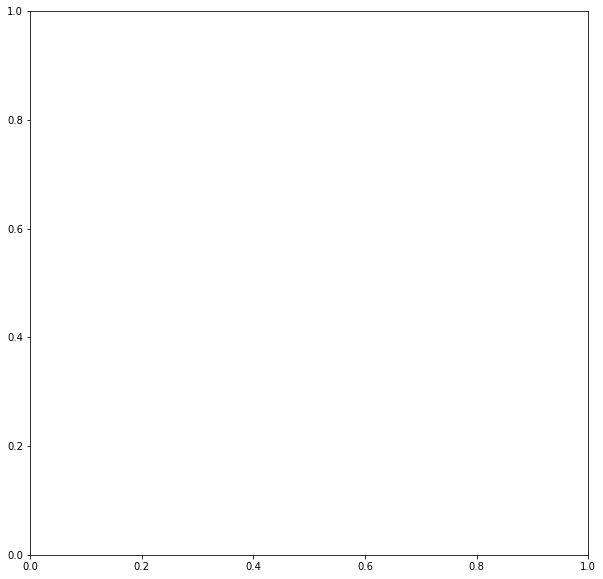

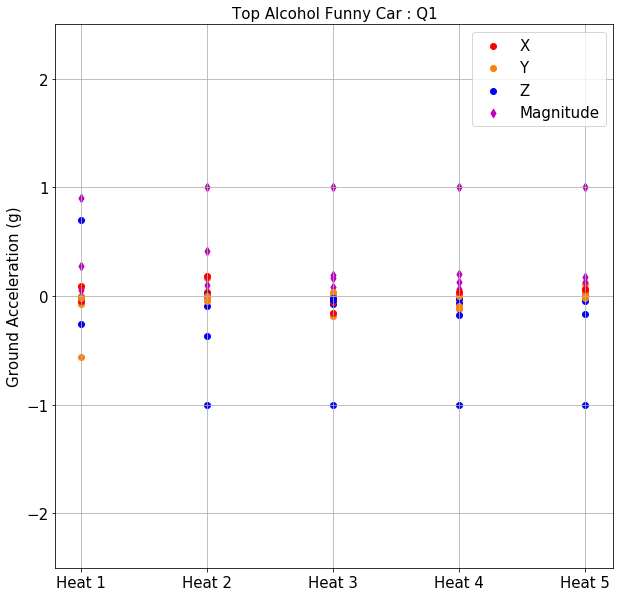

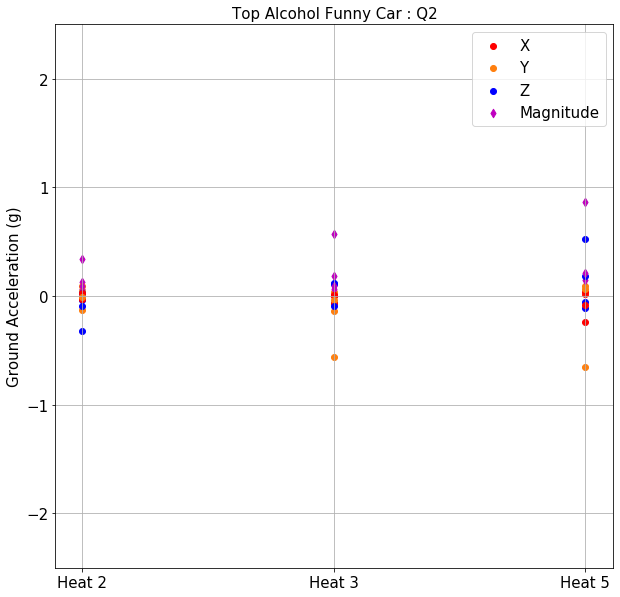

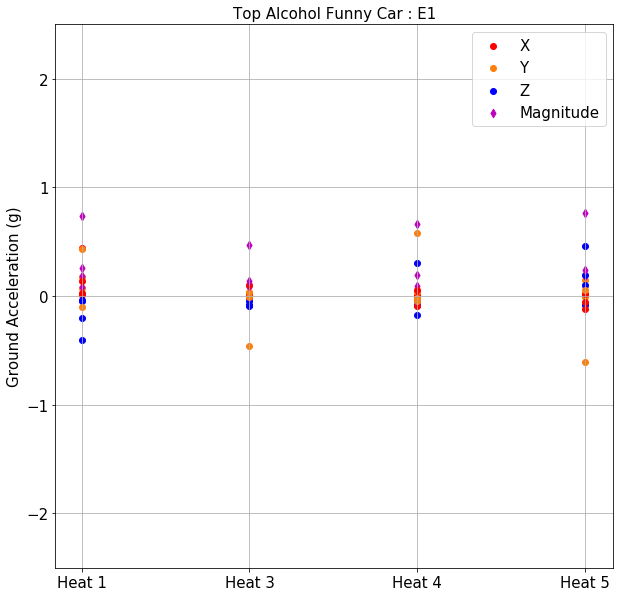

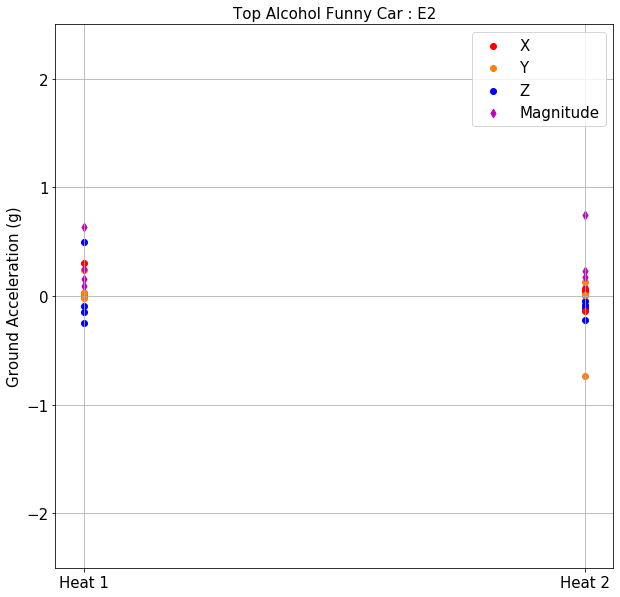

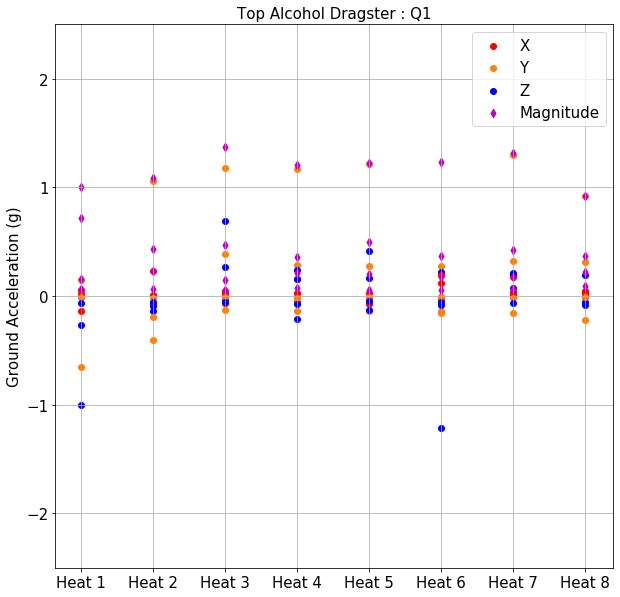

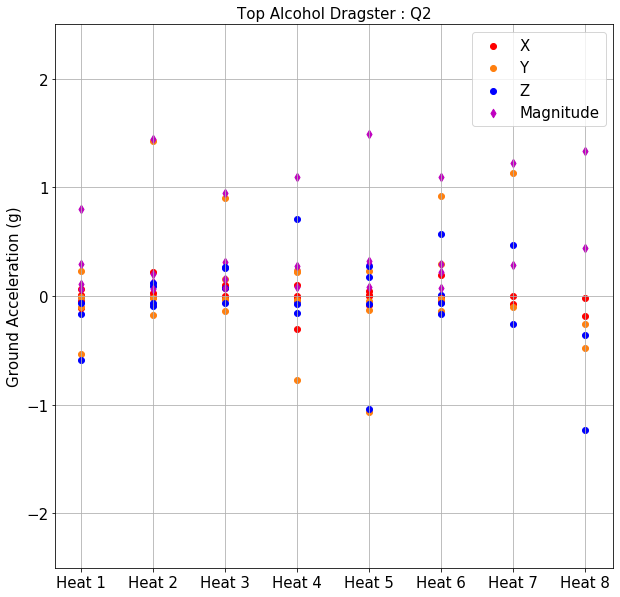

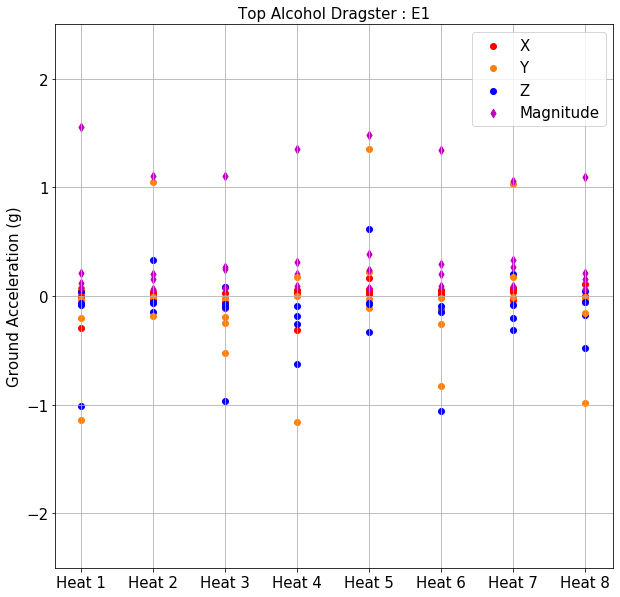

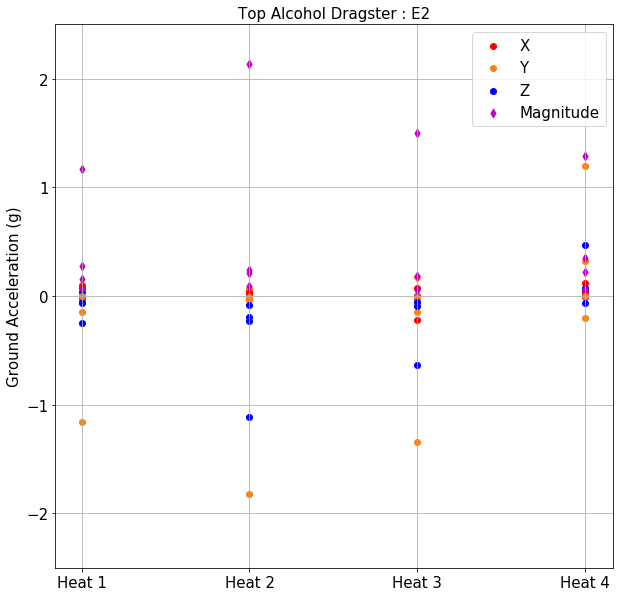

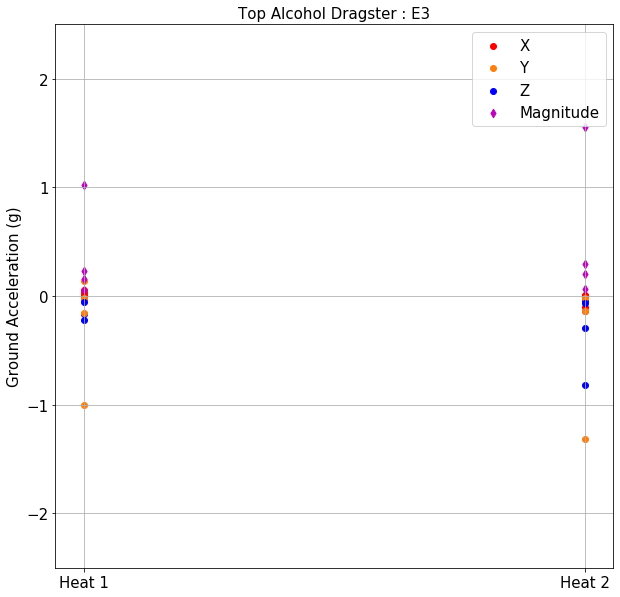

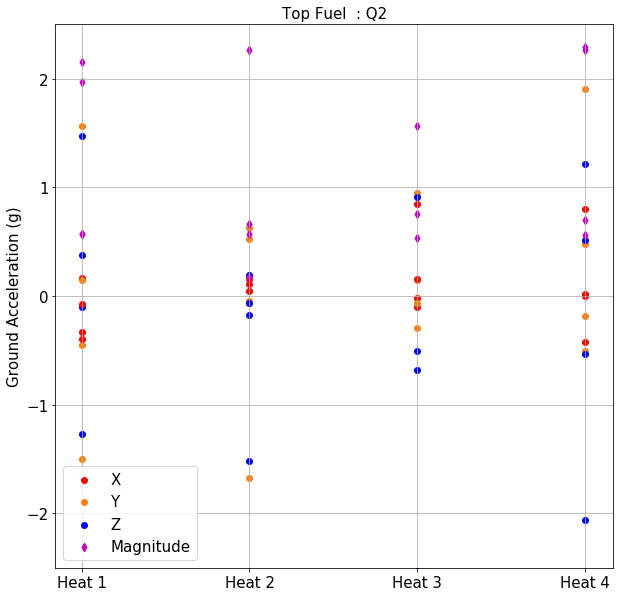

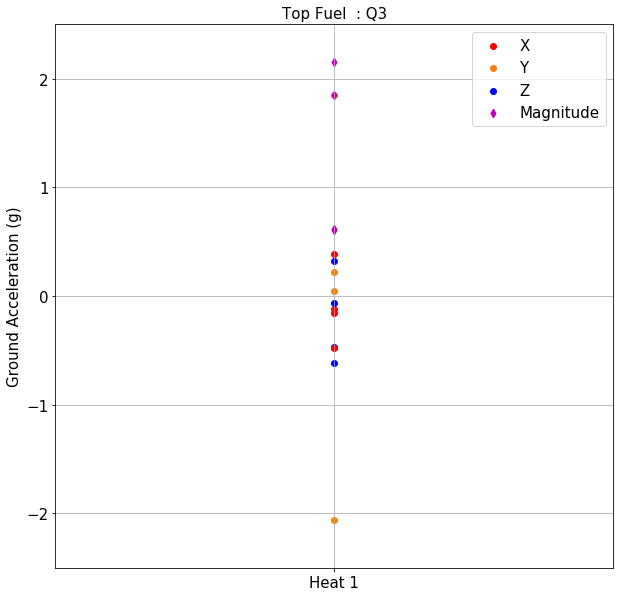

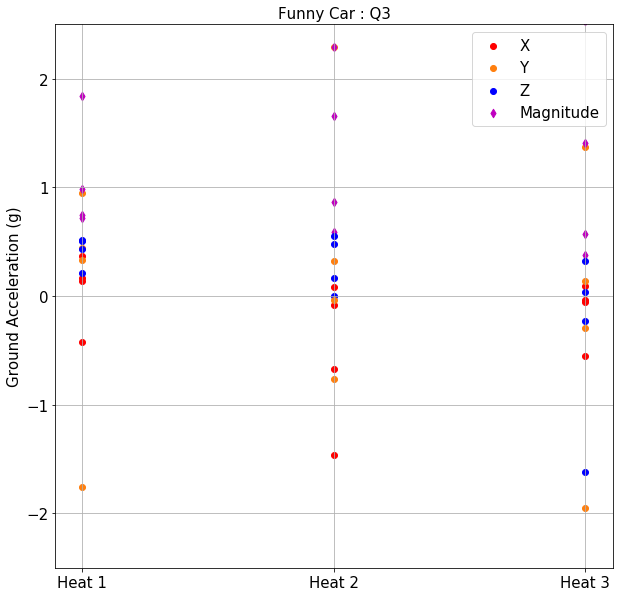

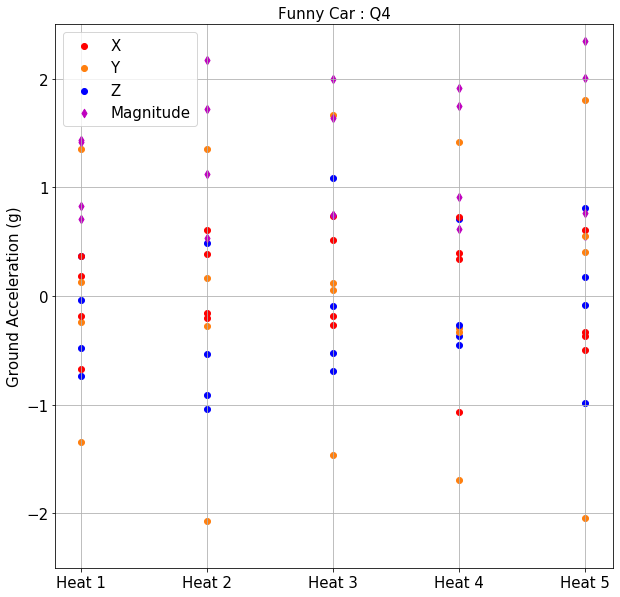

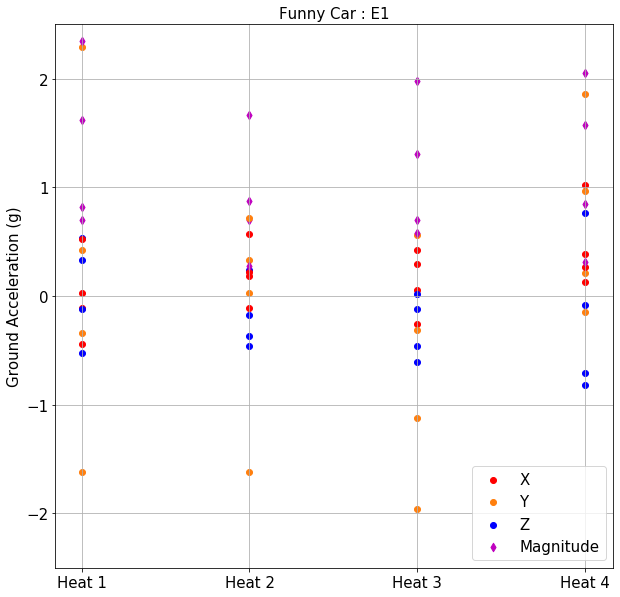

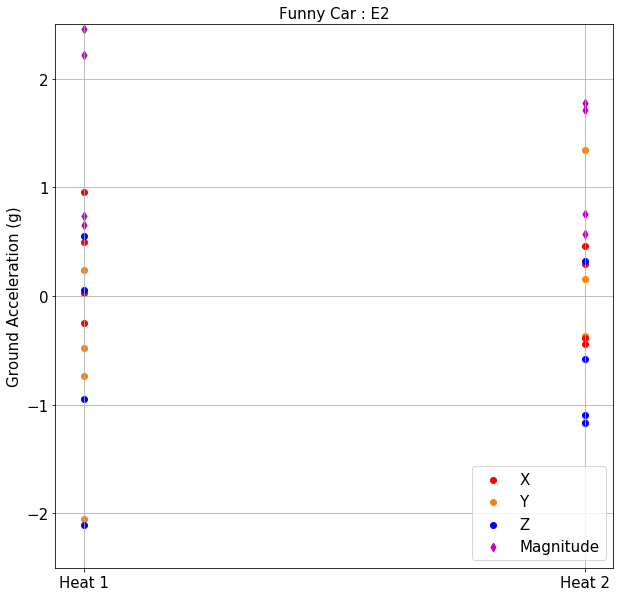

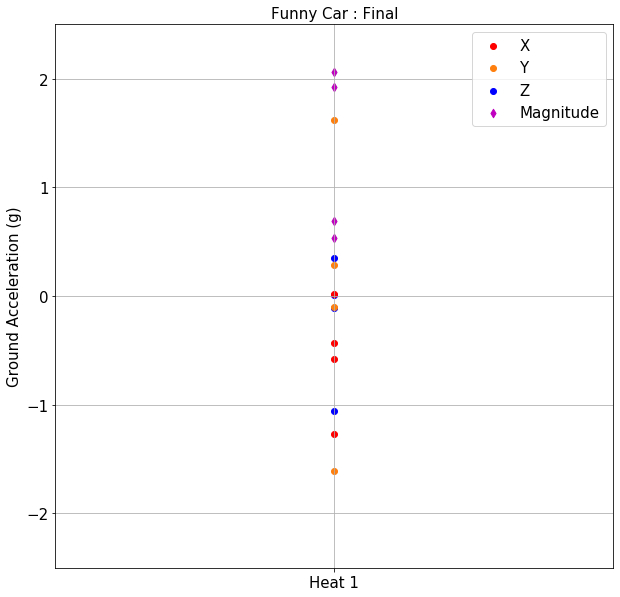

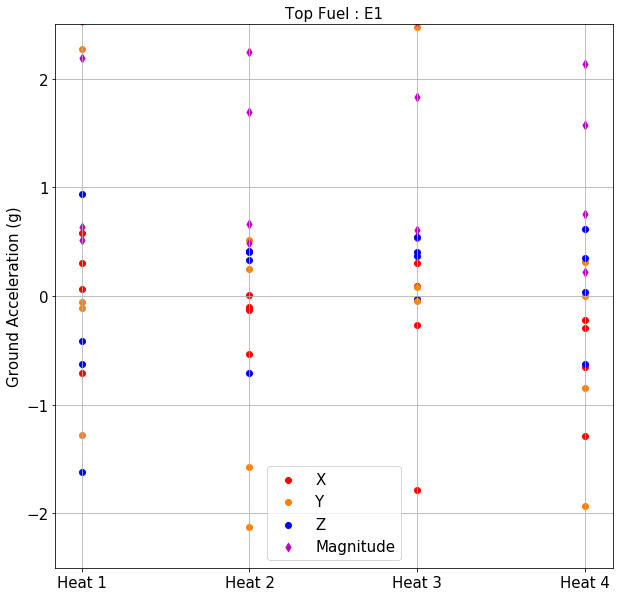

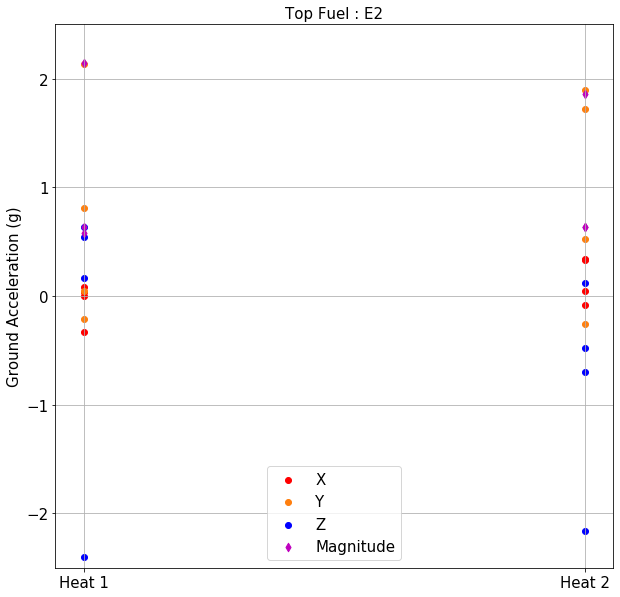

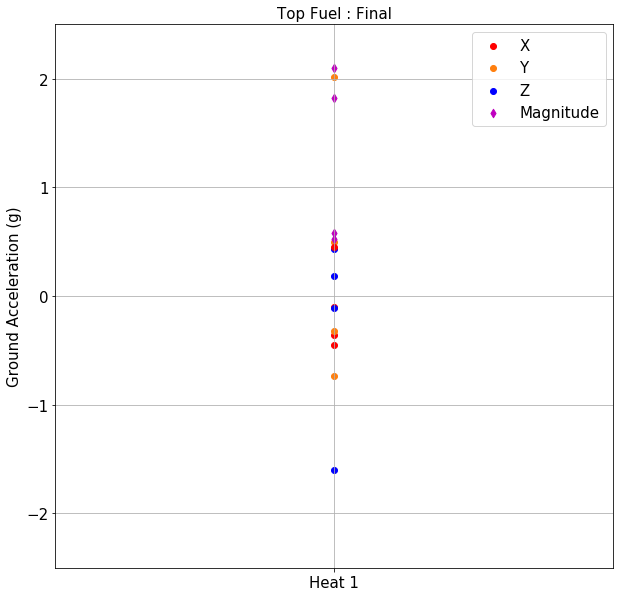

In [43]:
#for x in cat
#    for y in round
#        for z in heat
#        plot
#    save( cat round)
   
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for x in springInfo: # cat
    #print(x)
    for y in springInfo[x]: # round
        #print(y)
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        plt.ylim(top=2.5)  # adjust the top leaving bottom unchanged
        plt.ylim(bottom=-2.5)
        for z in springInfo[x][y]: # heat
            #print(z)
            for lines in springInfo[x][y][z]: # data in heat
                #print(lines)
                plt.scatter(z,float(lines[5]), color = 'r', label='X')
                plt.scatter(z,float(lines[6]), color = 'C1', label='Y')
                plt.scatter(z,float(lines[7]), color = 'b', label='Z')
                plt.scatter(z,float(lines[1]), color = 'm', label = 'Magnitude', marker = 'd')
                plt.title(x +' : '+ y, fontsize = 15)
                plt.legend(['X','Y','Z','Magnitude'], fontsize = 15)
                plt.ylabel('Ground Acceleration (g)', fontsize = 15)
                plt.yticks(fontsize = 15)
                plt.xticks(fontsize = 15)
                
                
            
        plt.grid()
        filename = x + '_' + y
        #print(filename)
        #plt.savefig('./springClean/Figures/sp_' + filename + '.png', bbox_inches='tight')
        plt.savefig('./springClean/Figures/sp_mag_' + filename + '.png', bbox_inches='tight')
        plt.show()    